# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [5]:
def f(x):
    return numpy.sin(x)*x**2

Ensure your function works with numpy arrays:

In [6]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [7]:
def g(x):
    return 2*x*numpy.sin(x)-((x**2)-2)*numpy.cos(x)-2

Check your solution with the same numpy array:

In [8]:
assert g(0) == 0.

In [9]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [196]:
def integrate_analytic(xmin, xmax):
    return g(xmax)-g(xmin)

1.0965907296271418

Check your analytic function:

In [11]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [216]:
def integrate_numeric(xmin, xmax, N):
    v=0
    w=0
    dx=(xmax-xmin)/N
    for i in range (1,N):
        v=v+2*f(xmin+(dx*i))
    for j in range (0,N):
        w=w+4*f(xmin+(dx*(((2*j)+1)/2)))
        
    return (dx/6)*(f(xmin)+f(xmax)+v+w)

integrate_numeric(0,4,50)

1.0965909955991098

Make sure you have implemented Simpson's rule correctly:

In [217]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [218]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Fractional Difference between Analytic and Numeric Integration ')

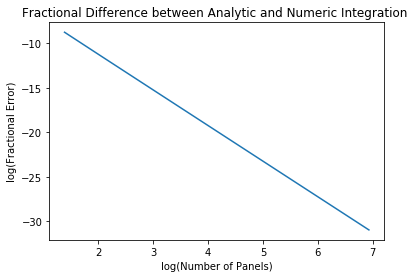

In [234]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
yvalues=[]
i=0
for i in range (0,9):
    yvalues.append((integrate_analytic(x0,x1)-integrate_numeric(x0,x1,(2**(i+2))))/integrate_analytic(x0,x1))
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
plt.plot(numpy.log(panel_counts),numpy.log(yvalues))
plt.xlabel('log(Number of Panels)')
plt.ylabel('log(Fractional Error)')
plt.title('Fractional Difference between Analytic and Numeric Integration ')

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels increases the accuracy of the numerical method exponentially, up to the point where numerical round off causes inaccuracies due to too many panels giving a very small dx.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Increasing panels also increases accuracy exponentially with the trapezium rule, but at a slower exponential rate. The gradient on the graph would be shallower for the trapezium rule.